In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Dataset_1.csv')

1.Compréhension des données

In [6]:
# 1. Aperçu des premières lignes du jeu de données
print(df.head())

       Marque  Modèle    Année                        Kilométrage  Energie  \
0  Volkswagen  Golf 8  12.2020   26 000                        km  Essence   
1  Volkswagen  Golf 6  11.2010  268 400                        km   Diesel   
2          MG       5   3.2022   26 000                        km  Essence   
3          DS       3   5.2012  138 000                        km  Essence   
4     Peugeot     206   7.2005  183 000                        km  Essence   

  Puissance fiscale Puissance (ch.din) Cylindrée Boite vitesse Catégorie  \
0               6cv                NaN   1000cm³      Manuelle  Occasion   
1               5cv          105ch dyn   1598cm³      Manuelle  Occasion   
2               7cv                NaN   1498cm³   Automatique  Occasion   
3               6cv                NaN   1399cm³   Automatique  Occasion   
4               4cv                NaN    999cm³      Manuelle  Occasion   

                Prix  
0  109 000        DT  
1   35 000        DT  
2   7

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marque              2566 non-null   object 
 1   Modèle              2566 non-null   object 
 2   Année               2566 non-null   float64
 3   Kilométrage         2566 non-null   object 
 4   Energie             2566 non-null   object 
 5   Puissance fiscale   2566 non-null   object 
 6   Puissance (ch.din)  1471 non-null   object 
 7   Cylindrée           2468 non-null   object 
 8   Boite vitesse       2562 non-null   object 
 9   Catégorie           2566 non-null   object 
 10  Prix                2566 non-null   object 
dtypes: float64(1), object(10)
memory usage: 220.6+ KB
None


In [8]:
# 2. Vérification des types de données
print("\nTypes de données des colonnes :")
print(df.dtypes)  # Affiche les types de données de chaque colonne


Types de données des colonnes :
Marque                 object
Modèle                 object
Année                 float64
Kilométrage            object
Energie                object
Puissance fiscale      object
Puissance (ch.din)     object
Cylindrée              object
Boite vitesse          object
Catégorie              object
Prix                   object
dtype: object


On constate que plusieurs features sont de type object alors qu'ils ont des valeurs numériques, ceci est due au fait que à l'extraction des données quelques features numériques étaient accompagnés de leur suffix 

In [9]:
# 3. Vérification des valeurs manquantes
print("\nVérification des valeurs manquantes :")
print(df.isnull().sum())  # Affiche le nombre de valeurs manquantes pour chaque colonne



Vérification des valeurs manquantes :
Marque                   0
Modèle                   0
Année                    0
Kilométrage              0
Energie                  0
Puissance fiscale        0
Puissance (ch.din)    1095
Cylindrée               98
Boite vitesse            4
Catégorie                0
Prix                     0
dtype: int64


La moitié des valeurs du feature Puissance (ch.din) sont des valeurs manquantes. Ceci pose un grand probléme. On doit trouver une façon d'eliminer ces valeurs manquantes sans toucher à la validité du prédiction.
De meme pour le feature Cylindrée et boite vitesse, bien qu'ils ont quelques valeurs manquantes par rapport a la puissance (ch.din), mais on doit les gérer quand meme 

In [10]:
# 4. Résumé statistique des données
print("\nRésumé statistique des données :")
print(df.describe())  # Donne des informations statistiques comme la moyenne, l'écart-type, les min, max, etc.



Résumé statistique des données :
             Année
count  2566.000000
mean    362.004455
std     768.660833
min       1.199300
25%       4.202225
50%       8.201500
75%      11.202000
max    2024.000000


In [11]:
# 5 Vérifiez le nombre de valeurs uniques de chaque colonne
df.nunique()

Marque                105
Modèle                841
Année                 262
Kilométrage           464
Energie                11
Puissance fiscale      66
Puissance (ch.din)    241
Cylindrée             283
Boite vitesse           2
Catégorie               2
Prix                  778
dtype: int64

Pour les valeurs catégoriques, on doit faire attention à la casse.

In [12]:
# 6. Vérifier la duplication
df.duplicated().sum()


5

On a 5 doublons

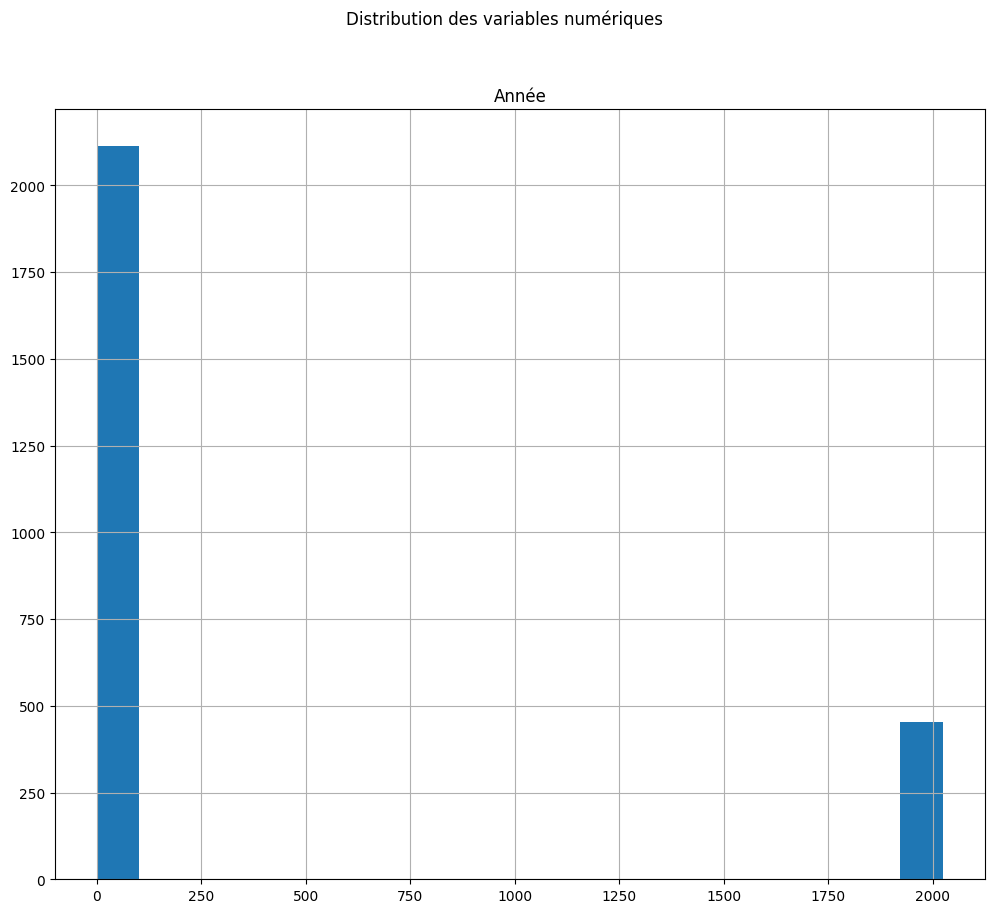

In [13]:
# 7. Visualisation de la distribution des variables
# Affiche un histogramme pour chaque colonne numérique
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution des variables numériques")
plt.show()

Pour l'année, on constate une anormalité.En fait, ce feature a beacoup de valeurs erronées: de 0 à 31 ce n'est pas logique. Ceci est due au fait que a l'extraction des données, on a retenu le mois et l'année de façon à avoir un format mm.aaaa 
Solution: Juste retenur l'année 

2. Prétraitement des donées

   1.Correction des Types de Données 
      Solution: Eleminer les suffix dans les colonnes 'Puissance fiscale', 'Kilométrage', 'Prix', 'Cylindrée', 'Puissance (ch.din)' et rendre les features numériques de type int64

In [14]:
# Liste des colonnes à nettoyer
colonnes = ['Puissance fiscale', 'Kilométrage', 'Prix', 'Cylindrée', 'Puissance (ch.din)']

# Fonction pour nettoyer une colonne spécifique
def nettoyer_colonne(colonne):
    # Suppression des caractères non numériques, y compris les espaces
    df[colonne] = df[colonne].replace(r'[^\d]', '', regex=True)
    
    # Conversion en numérique (int ou float selon la valeur)
    df[colonne] = pd.to_numeric(df[colonne], errors='coerce')  # 'coerce' transforme les erreurs en NaN
    
    # Gestion des valeurs NaN ou autres exceptions (pour le moment)
    df[colonne] = df[colonne].fillna(0)  # Remplacer NaN par 0 ou une autre valeur (selon votre besoin)
    
    # Conversion en type int64 pour les colonnes spécifiées
    if colonne in ['Puissance fiscale', 'Puissance (ch.din)', 'Cylindrée']:
        df[colonne] = df[colonne].astype(np.int64)  # Conversion en int64
    return df[colonne]

# Appliquer la fonction de nettoyage sur chaque colonne
for col in colonnes:
    df[col] = nettoyer_colonne(col)

# Vérification des résultats
print(df.dtypes)  # Afficher les types de données après nettoyage
print(df[colonnes].head())  # Afficher les premières lignes des colonnes nettoyées

Marque                 object
Modèle                 object
Année                 float64
Kilométrage             int64
Energie                object
Puissance fiscale       int64
Puissance (ch.din)      int64
Cylindrée               int64
Boite vitesse          object
Catégorie              object
Prix                    int64
dtype: object
   Puissance fiscale  Kilométrage    Prix  Cylindrée  Puissance (ch.din)
0                  6        26000  109000       1000                   0
1                  5       268400   35000       1598                 105
2                  7        26000   70000       1498                   0
3                  6       138000   35000       1399                   0
4                  4       183000   17000        999                   0


   2. Nettoyage des Textes
      uniformiser la casse

In [15]:
df['Marque'] = df['Marque'].str.lower().str.replace(r'[ -]', '', regex=True)
df['Modèle'] = df['Modèle'].str.lower().str.replace(r'[ -]', '', regex=True)
df['Energie']=df['Energie'].str.lower()

   3. Suppression des Doublons

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

   4. Correction des valeurs erronées

In [17]:
import pandas as pd

# Fonction pour extraire l'année correctement
def extract_year(value):
    # Vérification si la valeur est un float
    if isinstance(value, float):
        # Si la valeur a une partie décimale (pas un entier pur)
        if value % 1 != 0:
            # Extraire les 4 chiffres après la virgule (par exemple 12.2020 -> 2020)
            return int((value*10000)%10000)
        else:
            return int(value)  # Si la valeur est un entier, la retourner telle quelle
    return value  # Si ce n'est pas un float, retourner la valeur telle quelle

# Appliquer la fonction à la colonne 'Année'
df['Année'] = df['Année'].apply(extract_year)

# Afficher le dataframe pour vérifier les résultats
print(df["Année"])




0       2020
1       2010
2       2022
3       2012
4       2005
        ... 
2561    2020
2562    2017
2563    2018
2564    2020
2565    2021
Name: Année, Length: 2561, dtype: int64


In [18]:
df.to_csv('data_cleaned.csv', index=False)


   5. Gestion des valeurs manquantes(comment gerer les valeurs manquantes pour des features catégorique?)
   6. correction des valeurs Anormale (outliers)(je pense qu'on a besoin de faire un plot pour visualiser si on a des outliers)
3. Transformation des données:
   1. Encodage des Variables catégoriques ( Est que je dois eleminer les espaces pour avoir un encodage correcte? )
   2. Normalisation ou standarisation (Comment on a su qu'on a besoin de l'une ou de l'autre, visualisation des données necessaires)
   3. Creation de nouvelles variables si necessaires 
   4. Reduction de la dimensionnalité (pca si necessaire) 
4. Sélection des caracteristiques
   1. Suppression des colonnes inutiles
   2. Analyse des corrélation
   3. Méthodes Automatiques de Sélection
   4. Sélection Basée sur l'Importance
   5. Sélection Basée sur les Tests Statistiques

     

   5. Gestion des valeurs manquantes:

1. Gestion des valeurs manquantes du feature puissance (ch.din)

On a gérer les valeurs manquante du feature puissance(ch.din) par le modele random forest qui a donnée une estimation de ces valeurs avec un Score R² egale à 0.820

In [19]:
df = pd.read_csv('car_data_imputed_ordered.csv')

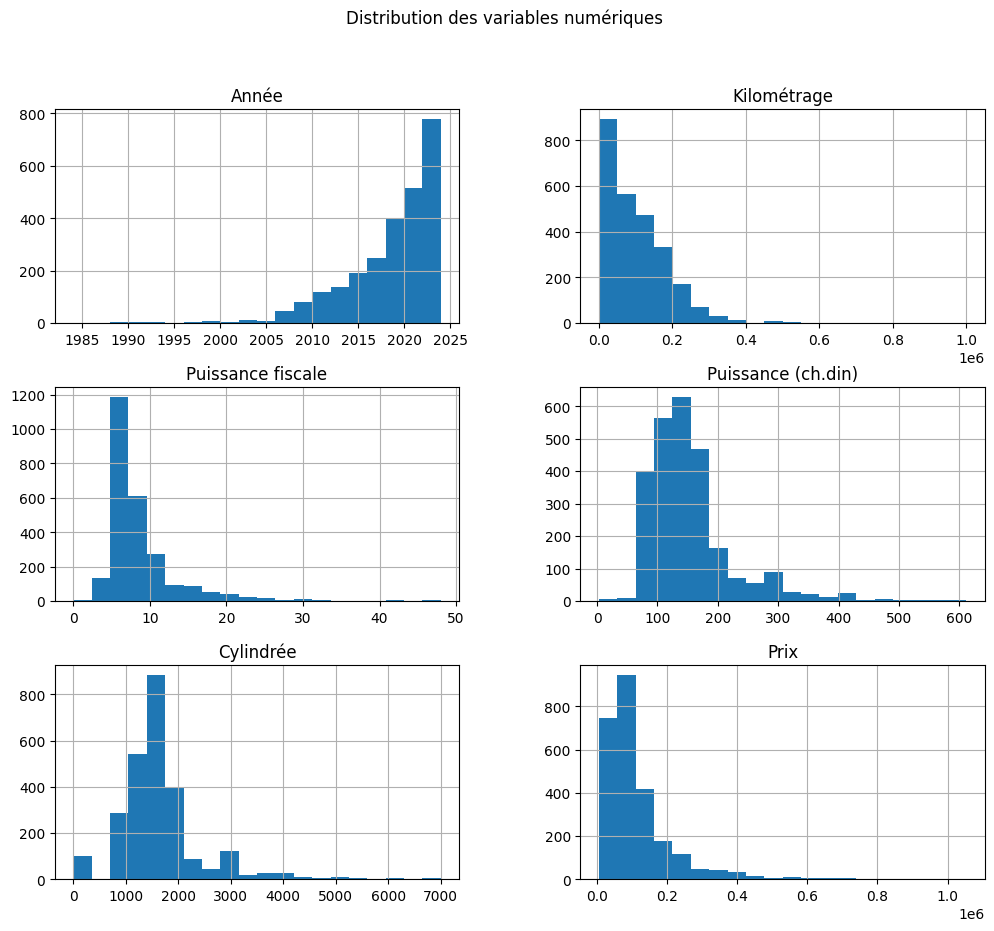

In [20]:
#  Visualisation de la distribution des variables
# Affiche un histogramme pour chaque colonne numérique
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution des variables numériques")
plt.show()

2. Gestion des valeurs manquantes du feature boite vitesse

On a parcouru le site et on a trouvé ces valeurs manqantes. C'était une erreur lors de l'extraction des données du site.

In [21]:
# Gestion des valeurs manqutes pour la boite Vitesse 
# Afficher les lignes avec des valeurs manquantes dans la colonne 'Boîte de Vitesses'
missing_boite_vitesse = df[df['Boite vitesse'].isna()]
# Afficher les résultats
print(missing_boite_vitesse)


Empty DataFrame
Columns: [Marque, Modèle, Année, Kilométrage, Energie, Puissance fiscale, Puissance (ch.din), Cylindrée, Boite vitesse, Catégorie, Prix]
Index: []


In [22]:
# Ajouter les valeurs dans la colonne "Boite vitesse"
df.loc[623, 'Boite vitesse'] = 'Manuelle'
df.loc[682, 'Boite vitesse'] = 'Manuelle'
df.loc[897, 'Boite vitesse'] = 'Automatique'
df.loc[1096, 'Boite vitesse'] = 'Manuelle'

# Vérifier les mises à jour
df.loc[[623, 682, 897, 1096], ['Boite vitesse']]


,Boite vitesse
623,Manuelle
682,Manuelle
897,Automatique
1096,Manuelle


3. Gestion des valeurs manquantes du feature Cylindrée
  On a decidé aprés des recherches de remplacer les valeurs manquantes par la médiane
  La médiane est robuste face aux valeurs aberrantes, ce qui garantit que le modèle ne sera pas biaisé.

In [23]:
# Calculer la médiane sans tenir compte des valeurs égales à 0
median_cylindree = df.loc[df['Cylindrée'] != 0, 'Cylindrée'].median()

# Remplacer les valeurs égales à 0 par la médiane
df['Cylindrée'] = df['Cylindrée'].replace(0, median_cylindree)

# Vérification
zeros_after = (df['Cylindrée'] == 0).sum()
print(f"Nombre de valeurs manquates après traitement : {zeros_after}")


Nombre de valeurs manquates après traitement : 0


In [24]:
# 3. Vérification des valeurs manquantes
print("\nVérification des valeurs manquantes :")
print(df.isnull().sum())  # Affiche le nombre de valeurs manquantes pour chaque colonne
zeros_cylindree = (df['Cylindrée'] == 0).sum()
zeros_puissance = (df['Puissance (ch.din)'] == 0).sum()
print(zeros_cylindree)
print(zeros_puissance)


Vérification des valeurs manquantes :
Marque                0
Modèle                0
Année                 0
Kilométrage           0
Energie               0
Puissance fiscale     0
Puissance (ch.din)    0
Cylindrée             0
Boite vitesse         0
Catégorie             0
Prix                  0
dtype: int64
0
0


6. correction des valeurs Anormale (outliers)

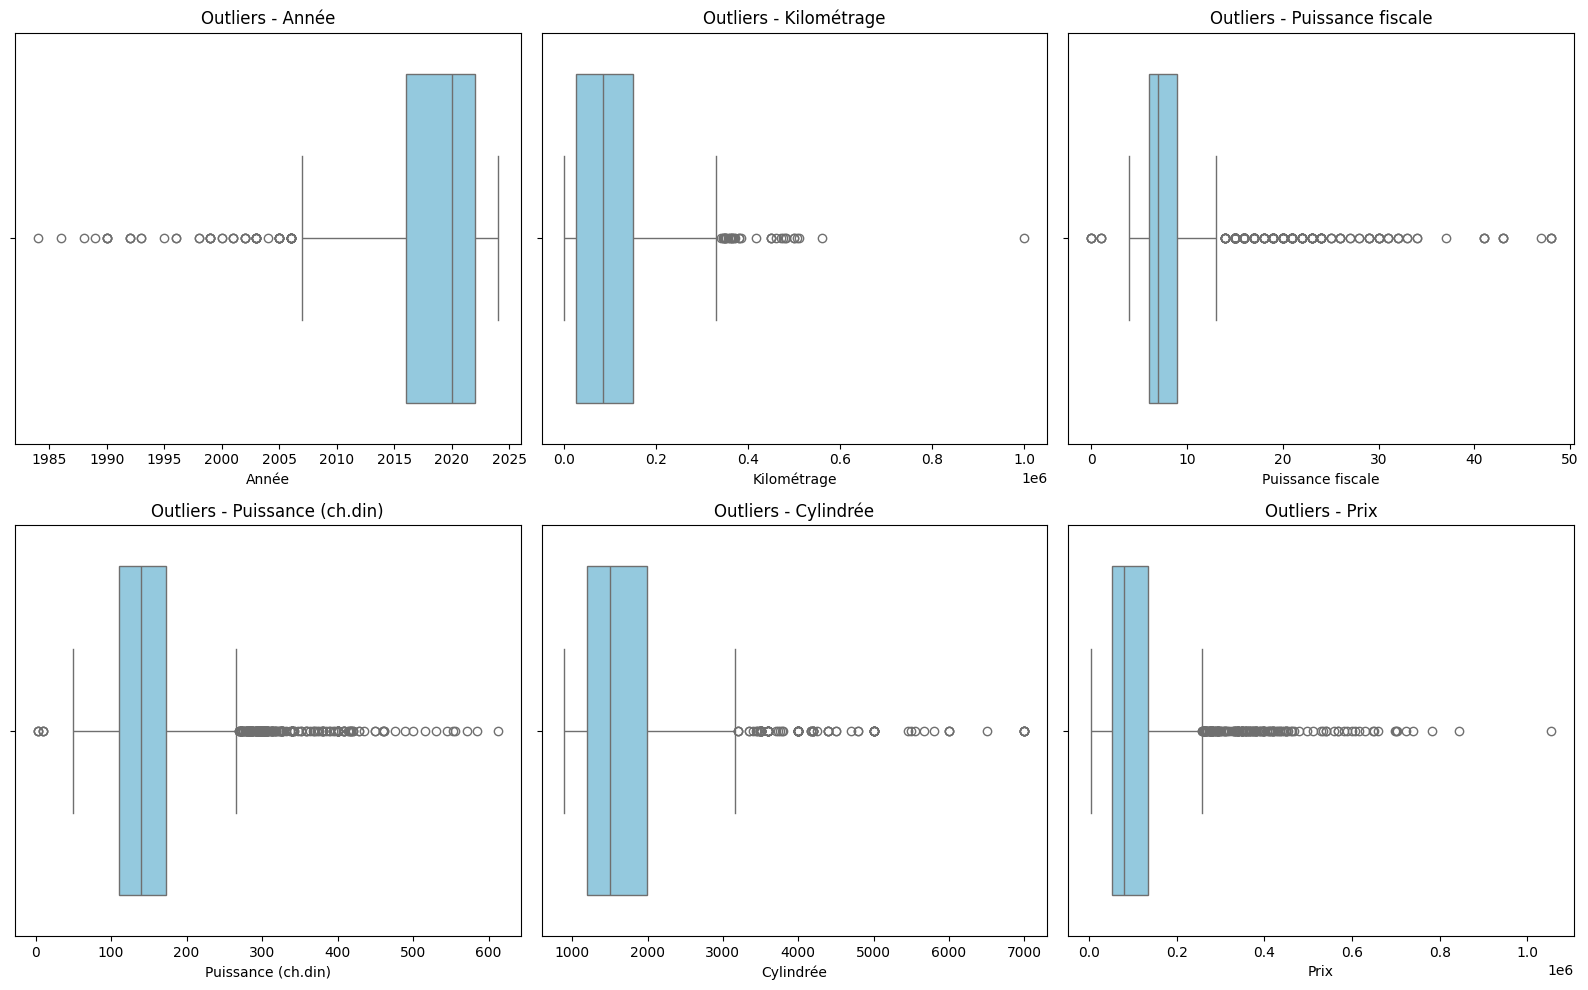

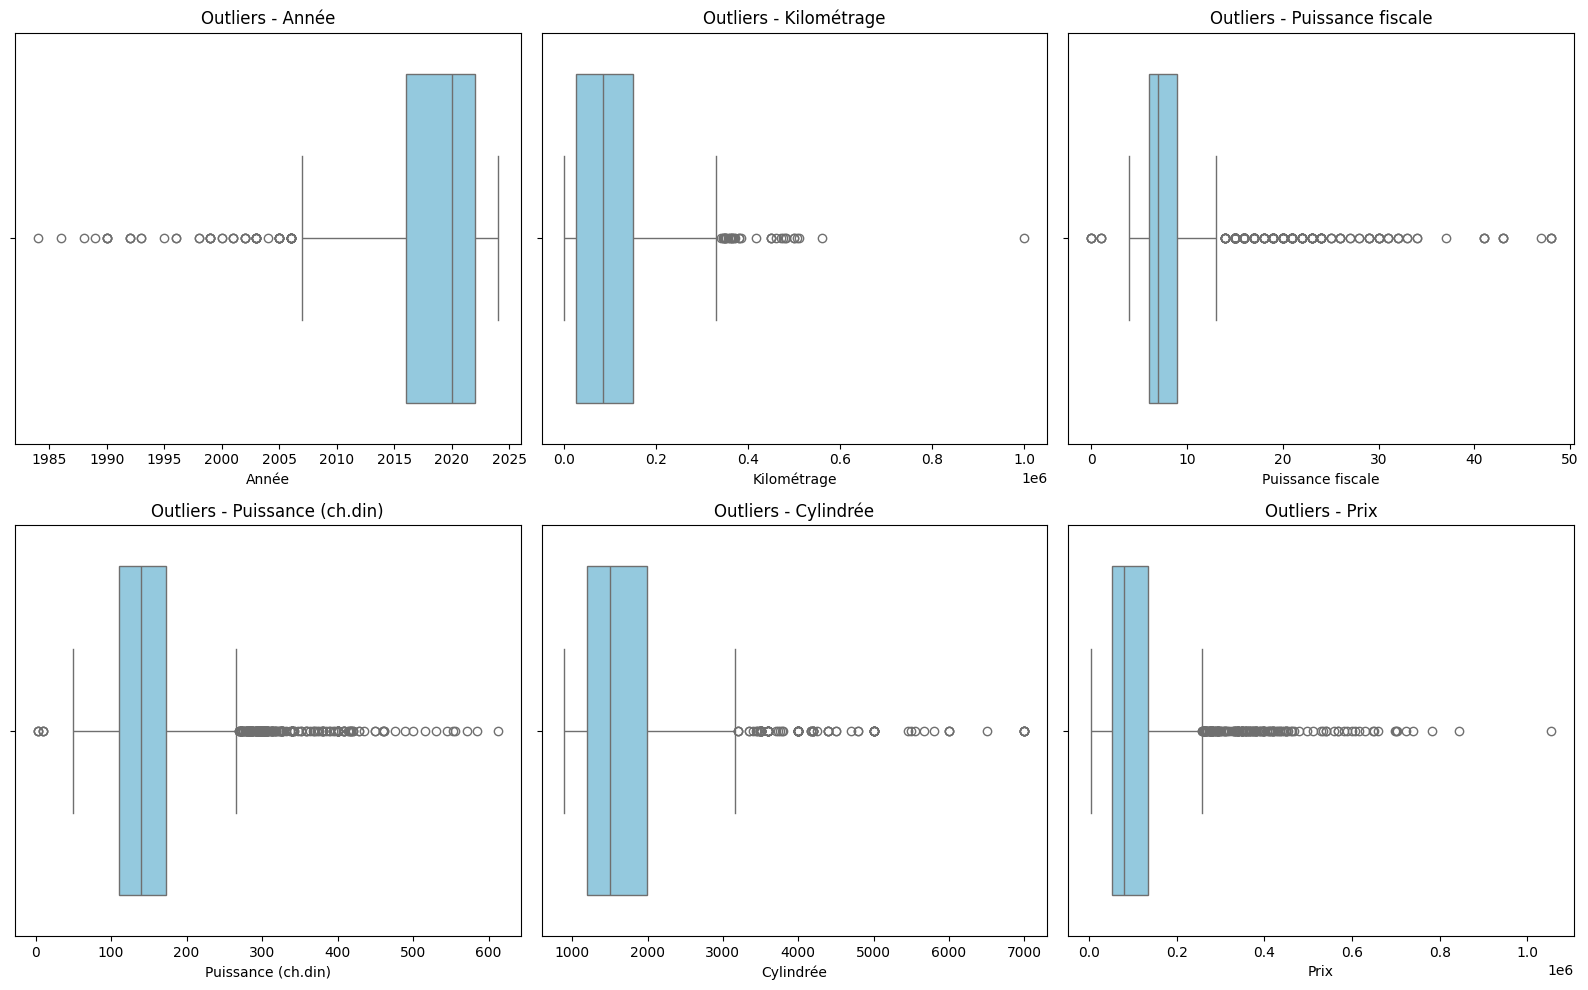

In [25]:
import seaborn as sns

# Sélection des colonnes numériques
colonnes_numeriques = ['Année', 'Kilométrage', 'Puissance fiscale', 
                       'Puissance (ch.din)', 'Cylindrée', 'Prix']

# Création des boxplots pour chaque colonne
plt.figure(figsize=(16, 10))

for i, colonne in enumerate(colonnes_numeriques, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[colonne], color='skyblue')
    plt.title(f"Outliers - {colonne}")

plt.tight_layout()
plt.show()

# Sélection des colonnes numériques
colonnes_numeriques = ['Année', 'Kilométrage', 'Puissance fiscale', 
                       'Puissance (ch.din)', 'Cylindrée', 'Prix']

# Création des boxplots pour chaque colonne
plt.figure(figsize=(16, 10))

for i, colonne in enumerate(colonnes_numeriques, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[colonne], color='skyblue')
    plt.title(f"Outliers - {colonne}")

plt.tight_layout()
plt.show()


In [26]:
df.to_csv('data_complet.csv', index=False)

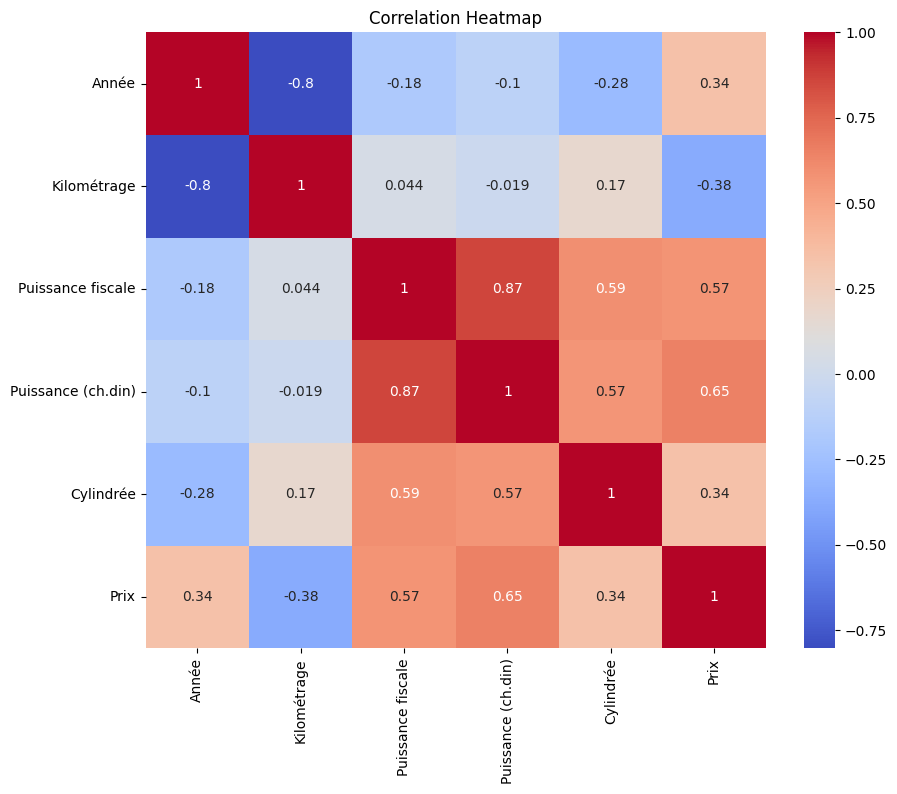

In [27]:
# Correlation Analysis
numerical_features=['Année','Kilométrage','Puissance fiscale','Puissance (ch.din)','Cylindrée','Prix']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

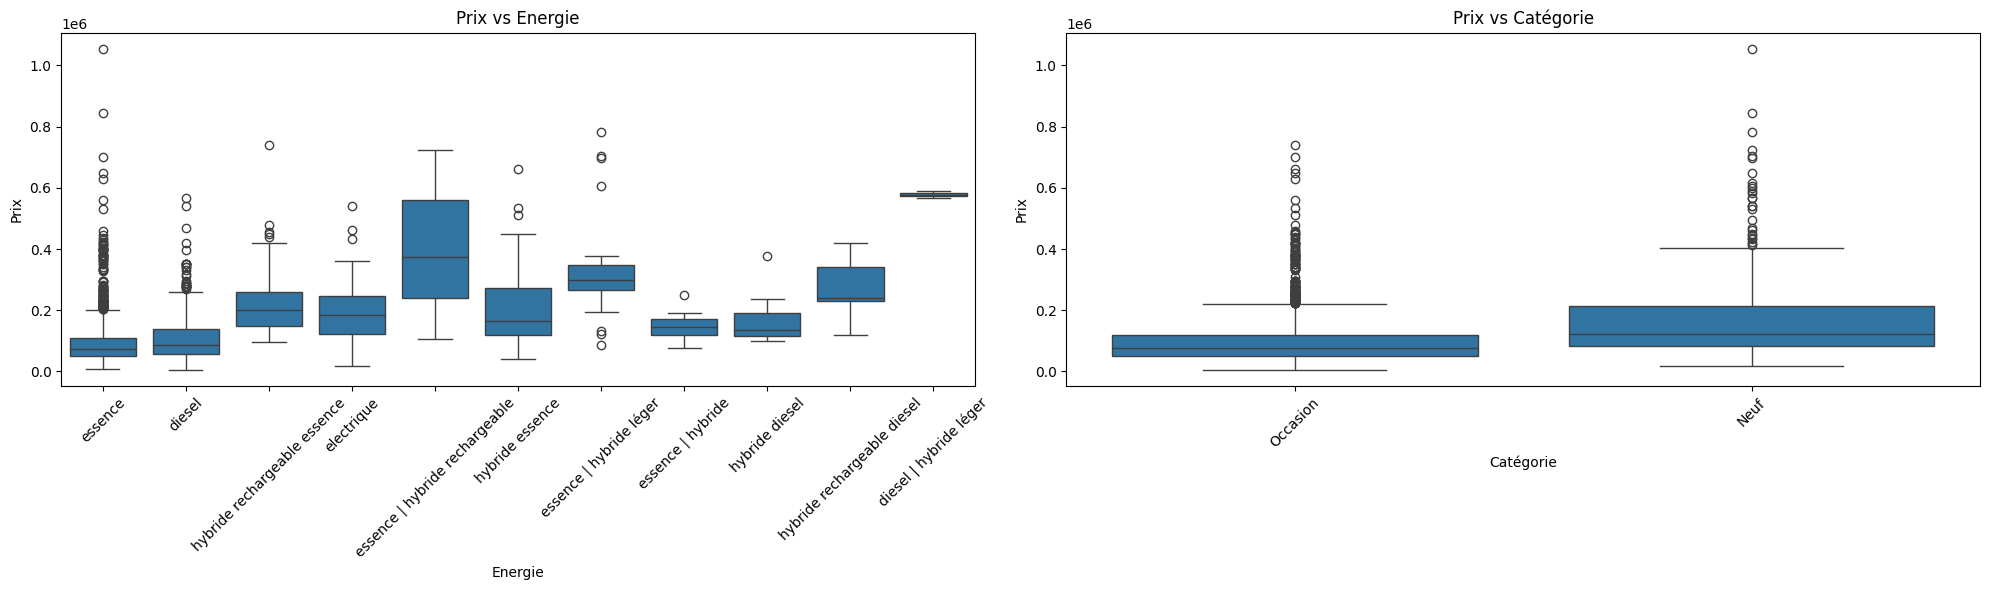

In [28]:
# Colonnes catégoriques à analyser
categorical_columns = ['Energie', 'Catégorie']

# Définir la taille de la figure
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 6))

# Création des graphiques
for ax, col in zip(axes, categorical_columns):
    sns.boxplot(x=df[col], y=df['Prix'], ax=ax)
    ax.set_title(f'Prix vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Prix')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3. Transformation des données

1. Encodage des Variables catégoriques:
  Marque
  Modéle
  Energie
  Boite vitesse: Label encoding
  Catégorie: Label encoding(il s'agit d'une variable binaire)

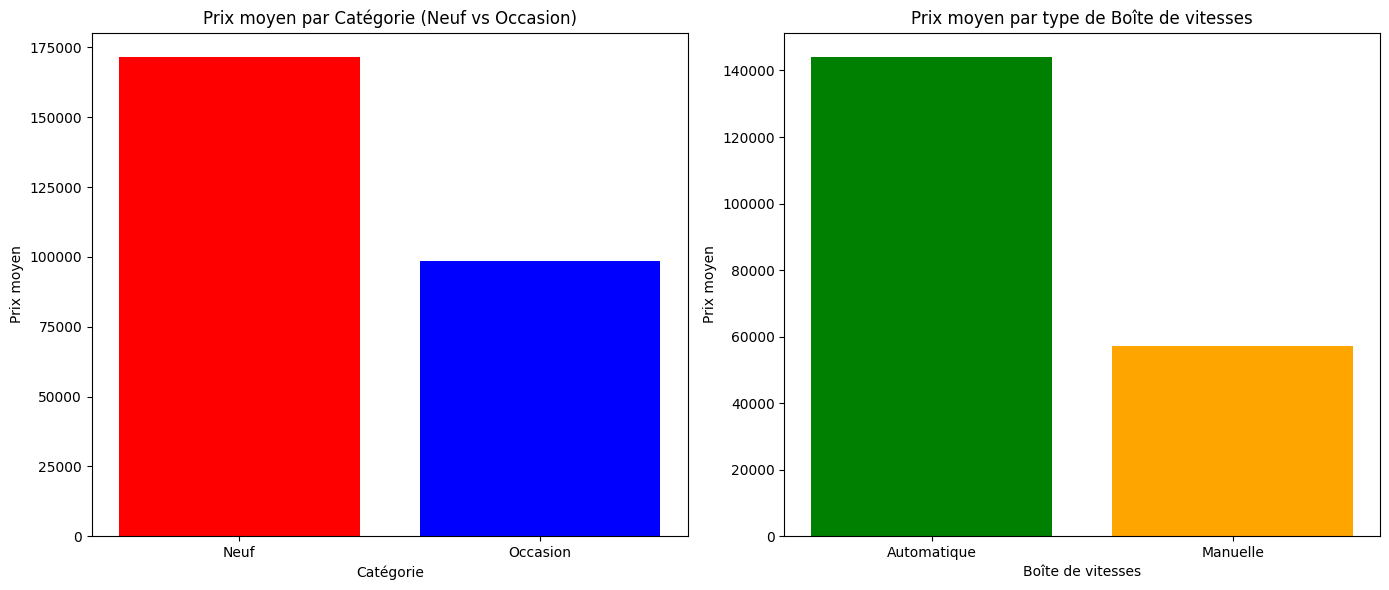

In [29]:
# Calcul des prix moyens par catégorie (Neuf vs Occasion)
prix_par_categorie = df.groupby('Catégorie')['Prix'].mean()

# Calcul des prix moyens par type de boîte de vitesses
prix_par_boite_vitesse = df.groupby('Boite vitesse')['Prix'].mean()

# Affichage des graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique des prix moyens par catégorie
axes[0].bar(prix_par_categorie.index, prix_par_categorie.values, color=['red', 'blue'])
axes[0].set_title('Prix moyen par Catégorie (Neuf vs Occasion)')
axes[0].set_xlabel('Catégorie')
axes[0].set_ylabel('Prix moyen')

# Graphique des prix moyens par type de boîte de vitesses
axes[1].bar(prix_par_boite_vitesse.index, prix_par_boite_vitesse.values, color=['green', 'orange'])
axes[1].set_title('Prix moyen par type de Boîte de vitesses')
axes[1].set_xlabel('Boîte de vitesses')
axes[1].set_ylabel('Prix moyen')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le label encoder
label_encoder = LabelEncoder()

# Encodage des colonnes
df['Catégorie'] = label_encoder.fit_transform(df['Catégorie'])
df['Boite vitesse'] = label_encoder.fit_transform(df['Boite vitesse'])


Catégorie (Neuf vs Occasion) : Étant donné que le prix des voitures Neuves est généralement plus élevé que celui des voitures d'Occasion, l'utilisation du Label Encoding permet de représenter cette hiérarchie de manière appropriée.

Boîte de vitesses : Comme les voitures avec une Boîte Automatique sont généralement plus chères que celles avec une Boîte Manuelle, le Label Encoding est adapté pour refléter cette différence de valeur.

In [31]:
# One-Hot Encoding pour Marque, Modèle et Énergie
df_encoded = pd.get_dummies(df, columns=['Marque', 'Modèle', 'Energie'], drop_first=True)


In [32]:
print(df_encoded.head())
df_encoded.to_csv('data_encoded.csv', index=False)

   Année  Kilométrage  Puissance fiscale  Puissance (ch.din)  Cylindrée  \
0   2020        26000                  6                 117       1000   
1   2010       268400                  5                 105       1598   
2   2022        26000                  7                 118       1498   
3   2012       138000                  6                  95       1399   
4   2005       183000                  4                  88        999   

   Boite vitesse  Catégorie    Prix  Marque_audi  Marque_baicyx  ...  \
0              1          1  109000        False          False  ...   
1              1          1   35000        False          False  ...   
2              0          1   70000        False          False  ...   
3              0          1   35000        False          False  ...   
4              1          1   17000        False          False  ...   

   Energie_diesel | hybride léger  Energie_electrique  Energie_essence  \
0                           False         

Nous avons utilisé le One-Hot Encoding pour les colonnes Marque, Modèle et Énergie, car elles n'ont pas d'ordre logique et chaque catégorie doit être traitée de manière indépendante pour éviter d'introduire une hiérarchie artificielle dans le modèle.

In [33]:
# Afficher les statistiques descriptives
print(df[numerical_features].describe())

             Année    Kilométrage  Puissance fiscale  Puissance (ch.din)  \
count  2561.000000    2561.000000        2561.000000         2561.000000   
mean   2018.329559   96499.108551           8.636470          154.495900   
std       5.328207   86691.062836           4.933644           71.602729   
min    1984.000000       0.000000           0.000000            3.000000   
25%    2016.000000   25000.000000           6.000000          110.000000   
50%    2020.000000   84000.000000           7.000000          140.000000   
75%    2022.000000  148000.000000           9.000000          173.000000   
max    2024.000000  999999.000000          48.000000          612.000000   

         Cylindrée          Prix  
count  2561.000000  2.561000e+03  
mean   1700.859039  1.113176e+05  
std     731.935760  9.646374e+04  
min     898.000000  5.000000e+03  
25%    1200.000000  5.300000e+04  
50%    1500.000000  8.000000e+04  
75%    1995.000000  1.350000e+05  
max    7000.000000  1.054000e+06  


Normalisation (Min-Max Scaling) :

Utilisée quand les données sont uniformes ou proches de la normale.
Met les données dans une plage spécifique (souvent [0, 1]).
Problème : Très sensible aux outliers.
Standardisation (Z-score Scaling) :

Utilisée quand les données sont asymétriques ou ont des outliers.
Transforme les données avec moyenne = 0 et écart-type = 1.
Avantage : Moins influencée par les outliers et les asymétries.
Choix :
Normalisation : Si les données sont uniformes et sans trop d'outliers.
Standardisation : Si les données sont asymétriques ou contiennent des outliers.

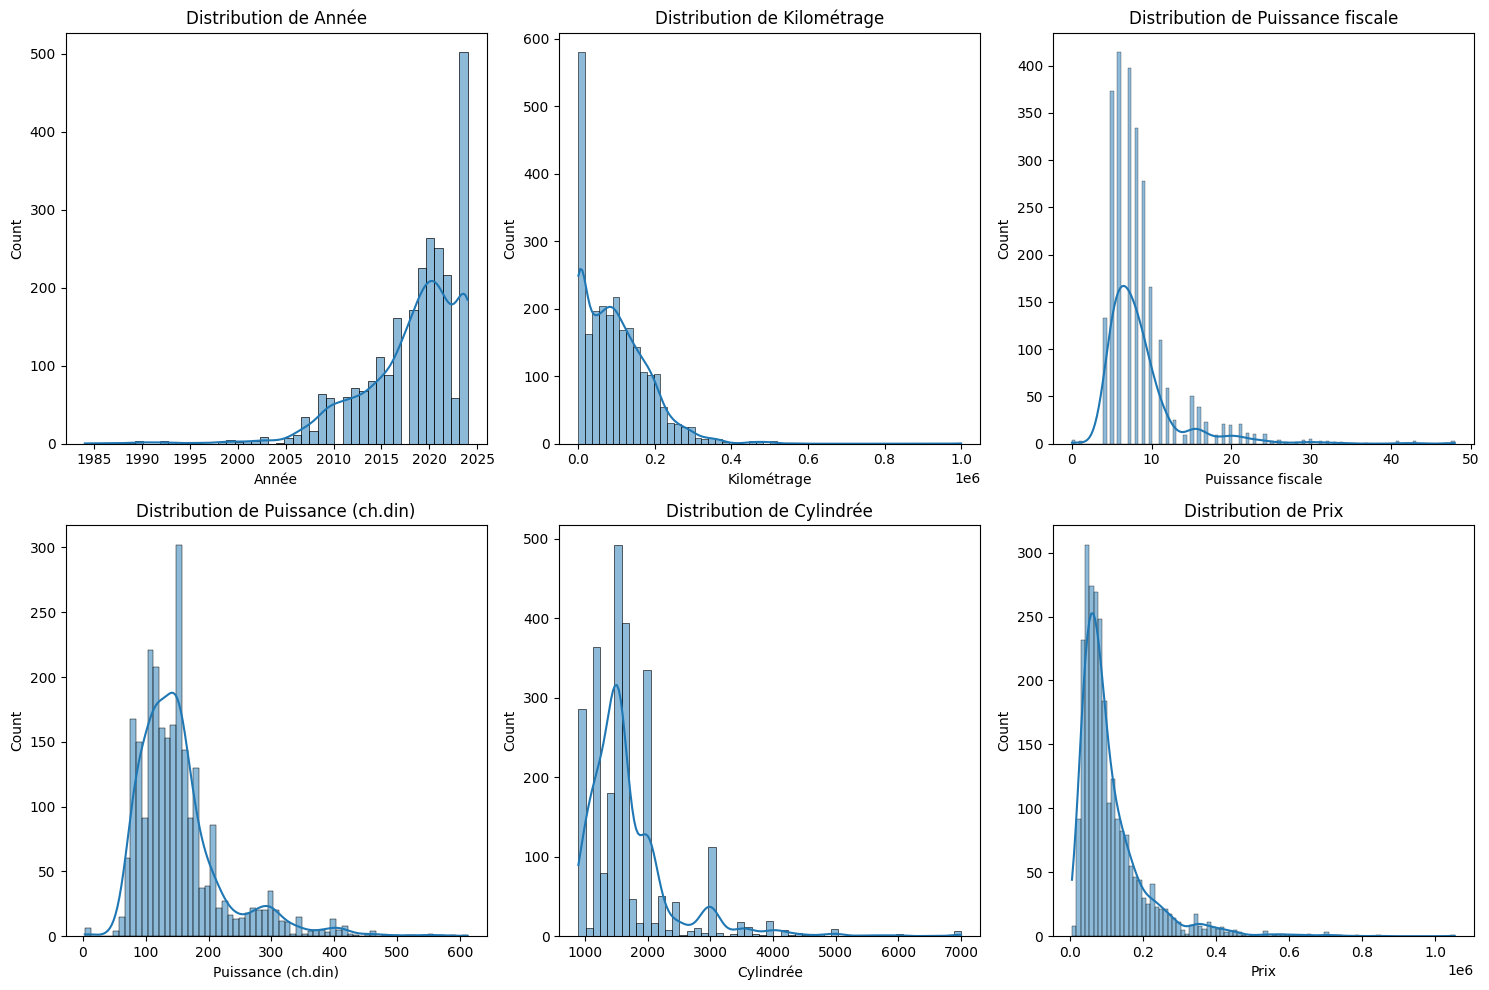

In [34]:
numeric_columns = ['Année', 'Kilométrage', 'Puissance fiscale', 'Puissance (ch.din)', 'Cylindrée', 'Prix']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()

In [35]:
from scipy import stats
# Calcul du Z-score
z_scores = stats.zscore(df[numerical_features])

# Détection des outliers (Z-score > 3)
outliers = (abs(z_scores) > 3)

# Calcul du pourcentage d'outliers par colonne
outlier_percentages = outliers.sum(axis=0) / len(df) * 100

# Affichage des colonnes avec leurs pourcentages
for col, perc in zip(numerical_features, outlier_percentages):
    print(f"{col}: {perc:.2f}%")


Année: 1.25%
Kilométrage: 0.98%
Puissance fiscale: 1.99%
Puissance (ch.din): 2.23%
Cylindrée: 2.38%
Prix: 2.03%


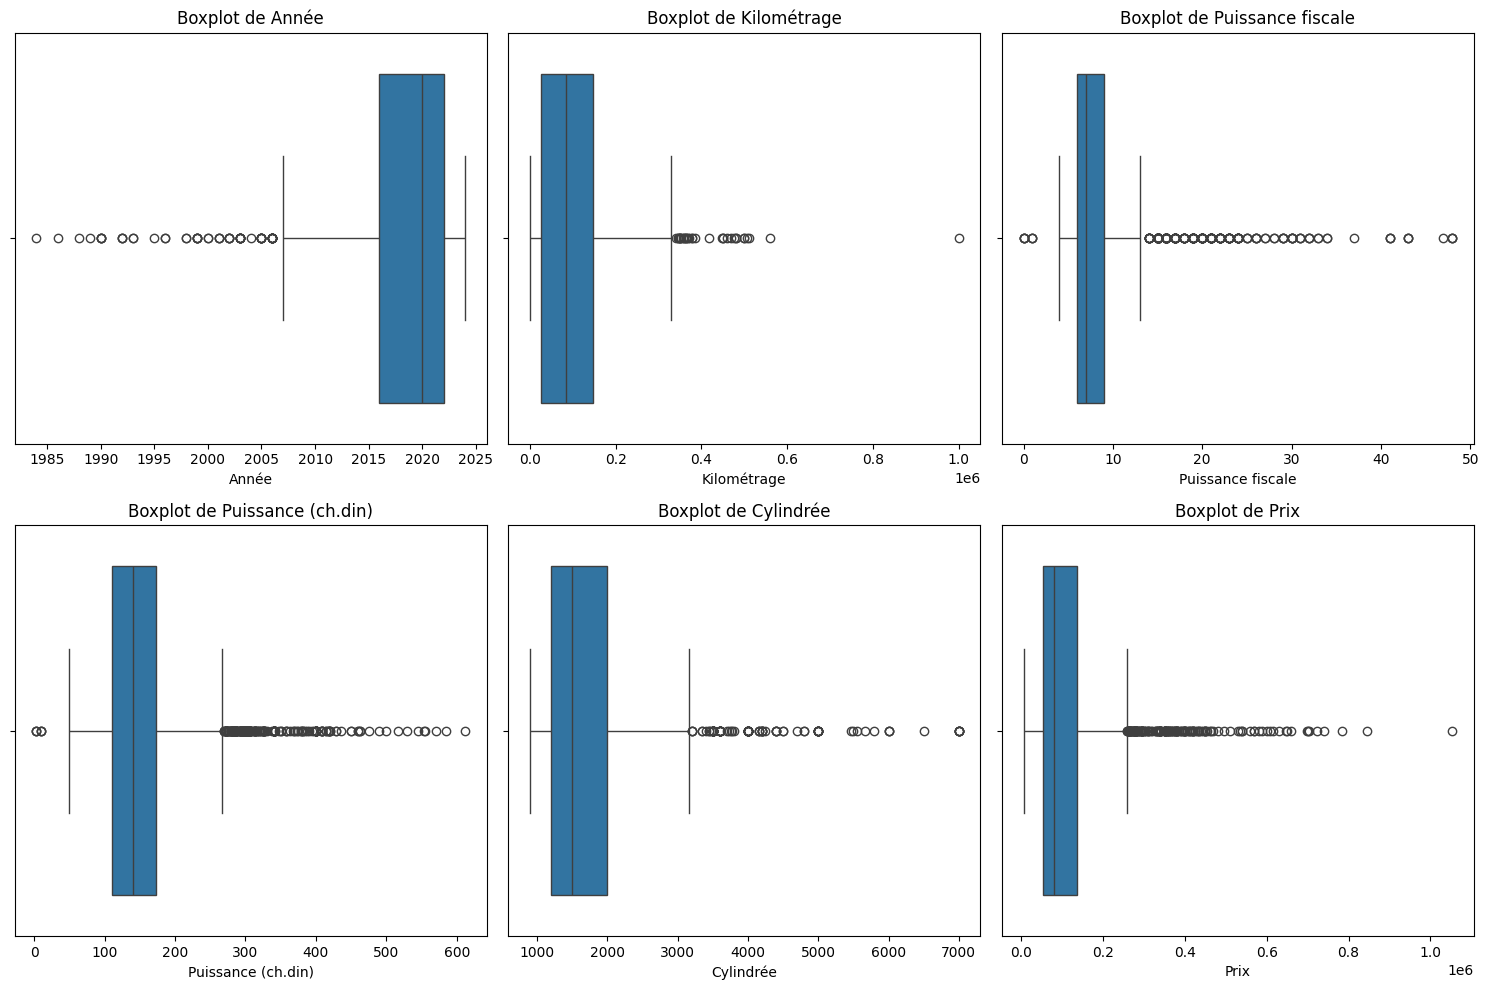

In [36]:
# Visualiser les boxplots pour détecter les outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Liste des colonnes numériques à normaliser
numeric_columns = ['Année', 'Kilométrage', 'Puissance fiscale', 'Puissance (ch.din)', 'Cylindrée', 'Prix']

# Initialiser le scaler MinMax
scaler_minmax = MinMaxScaler()

# Créer une copie du DataFrame pour la normalisation
df_normalized = df_encoded.copy()

# Appliquer la normalisation à chaque colonne numérique
df_normalized[numeric_columns] = scaler_minmax.fit_transform(df[numeric_columns])

df_normalized.to_csv('data_complet.csv', index=False)
# Afficher les premières lignes du DataFrame normalisé
print(df_normalized.head())

# Optionnel: Vérifiez les statistiques descriptives après normalisation
print(df_normalized[numeric_columns].describe())

   Année  Kilométrage  Puissance fiscale  Puissance (ch.din)  Cylindrée  \
0  0.900       0.0260           0.125000            0.187192   0.016716   
1  0.650       0.2684           0.104167            0.167488   0.114716   
2  0.950       0.0260           0.145833            0.188834   0.098328   
3  0.700       0.1380           0.125000            0.151067   0.082104   
4  0.525       0.1830           0.083333            0.139573   0.016552   

   Boite vitesse  Catégorie      Prix  Marque_audi  Marque_baicyx  ...  \
0              1          1  0.099142        False          False  ...   
1              1          1  0.028599        False          False  ...   
2              0          1  0.061964        False          False  ...   
3              0          1  0.028599        False          False  ...   
4              1          1  0.011439        False          False  ...   

   Energie_diesel | hybride léger  Energie_electrique  Energie_essence  \
0                           Fa

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler Standard
scaler_standard = StandardScaler()

# Créer une copie du DataFrame pour la standardisation
df_standardized = df_encoded.copy()

# Appliquer la standardisation à chaque colonne numérique
df_standardized[numeric_columns] = scaler_standard.fit_transform(df[numeric_columns])

# Afficher les premières lignes du DataFrame standardisé
print(df_standardized.head())

# Optionnel: Vérifiez les statistiques descriptives après standardisation
print(df_standardized[numeric_columns].describe())

      Année  Kilométrage  Puissance fiscale  Puissance (ch.din)  Cylindrée  \
0  0.313570    -0.813381          -0.534490           -0.523768  -0.957729   
1 -1.563600     1.983301          -0.737220           -0.691392  -0.140558   
2  0.689004    -0.813381          -0.331761           -0.509799  -0.277208   
3 -1.188166     0.478815          -0.534490           -0.831079  -0.412492   
4 -2.502186     0.998001          -0.939949           -0.928860  -0.959095   

   Boite vitesse  Catégorie      Prix  Marque_audi  Marque_baicyx  ...  \
0              1          1 -0.024030        False          False  ...   
1              1          1 -0.791308        False          False  ...   
2              0          1 -0.428406        False          False  ...   
3              0          1 -0.791308        False          False  ...   
4              1          1 -0.977943        False          False  ...   

   Energie_diesel | hybride léger  Energie_electrique  Energie_essence  \
0           

Standarisation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Séparation des caractéristiques (features) et de la variable cible (target)
X = df_standardized.drop('Prix', axis=1)  # Remplacez 'price' par le nom de votre colonne cible
y = df_standardized['Prix']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelisation:

1. Arbre de decision:

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Initialisation du modèle
decision_tree = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle
decision_tree.fit(X_train, y_train)

# Prédictions
y_pred_tree = decision_tree.predict(X_test)

# Évaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
explained_variance_tree = explained_variance_score(y_test, y_pred_tree)

print(f'Arbre de Décision - MSE: {mse_tree}')
print(f'Arbre de Décision - RMSE: {rmse_tree}')
print(f'Arbre de Décision - MAE: {mae_tree}')
print(f'Arbre de Décision - R²: {r2_tree}')
print(f'Arbre de Décision - Explained Variance: {explained_variance_tree}')


Arbre de Décision - MSE: 0.24082871318907498
Arbre de Décision - RMSE: 0.4907430215388447
Arbre de Décision - MAE: 0.25546946878649307
Arbre de Décision - R²: 0.7903472850188763
Arbre de Décision - Explained Variance: 0.7904127587889362


2. Random Forest:

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialisation du modèle
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
random_forest.fit(X_train, y_train)

# Prédictions
y_pred_rf = random_forest.predict(X_test)

# Évaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
explained_variance_rf = explained_variance_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}')
print(f'Random Forest - RMSE: {rmse_rf}')
print(f'Random Forest - MAE: {mae_rf}')
print(f'Random Forest - R²: {r2_rf}')
print(f'Random Forest - Explained Variance: {explained_variance_rf}')


Random Forest - MSE: 0.14597291803448204
Random Forest - RMSE: 0.3820640234757547
Random Forest - MAE: 0.19981059562208148
Random Forest - R²: 0.8729237133961711
Random Forest - Explained Variance: 0.8730143371292002


4. XGboost:

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Initialisation du modèle XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Entraînement du modèle
xgboost_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgboost_model.predict(X_test)

# Évaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
explained_variance_xgb = explained_variance_score(y_test, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb}')
print(f'XGBoost - RMSE: {rmse_xgb}')
print(f'XGBoost - MAE: {mae_xgb}')
print(f'XGBoost - R²: {r2_xgb}')
print(f'XGBoost - Explained Variance: {explained_variance_xgb}')


XGBoost - MSE: 0.13609917369999097
XGBoost - RMSE: 0.36891621501364097
XGBoost - MAE: 0.20042119964198488
XGBoost - R²: 0.8815192719545493
XGBoost - Explained Variance: 0.8816527415255351


5. SVM

In [43]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialisation du modèle SVR
svr_model = SVR(kernel='rbf')  # Choisir le kernel approprié (ici 'rbf' pour un modèle non linéaire)

# Entraînement du modèle
svr_model.fit(X_train, y_train)

# Prédictions
y_pred_svr = svr_model.predict(X_test)

# Évaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - MSE: {mse_svr}')
print(f'SVR - RMSE: {rmse_svr}')
print(f'SVR - MAE: {mae_svr}')
print(f'SVR - R²: {r2_svr}')


SVR - MSE: 0.16465708321038003
SVR - RMSE: 0.4057795993028482
SVR - MAE: 0.19979796155002266
SVR - R²: 0.8566582693616493


6. GBM

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialisation du modèle Gradient Boosting
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
gbm_model.fit(X_train, y_train)

# Prédictions
y_pred_gbm = gbm_model.predict(X_test)

# Évaluation
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'GBM - MSE: {mse_gbm}')
print(f'GBM - RMSE: {rmse_gbm}')
print(f'GBM - MAE: {mae_gbm}')
print(f'GBM - R²: {r2_gbm}')


GBM - MSE: 0.13523743599572335
GBM - RMSE: 0.3677464289367381
GBM - MAE: 0.2221649488284263
GBM - R²: 0.882269455132082


Neural Networks (réseaux de neurones)

In [45]:
from sklearn.neural_network import MLPRegressor

# Initialisation du modèle MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Entraînement du modèle
mlp_model.fit(X_train, y_train)

# Prédictions
y_pred_mlp = mlp_model.predict(X_test)

# Évaluation
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP - MSE: {mse_mlp}')
print(f'MLP - RMSE: {rmse_mlp}')
print(f'MLP - MAE: {mae_mlp}')
print(f'MLP - R²: {r2_mlp}')


MLP - MSE: 0.17948650295216864
MLP - RMSE: 0.42365847442505933
MLP - MAE: 0.22352526094988345
MLP - R²: 0.8437485624197709


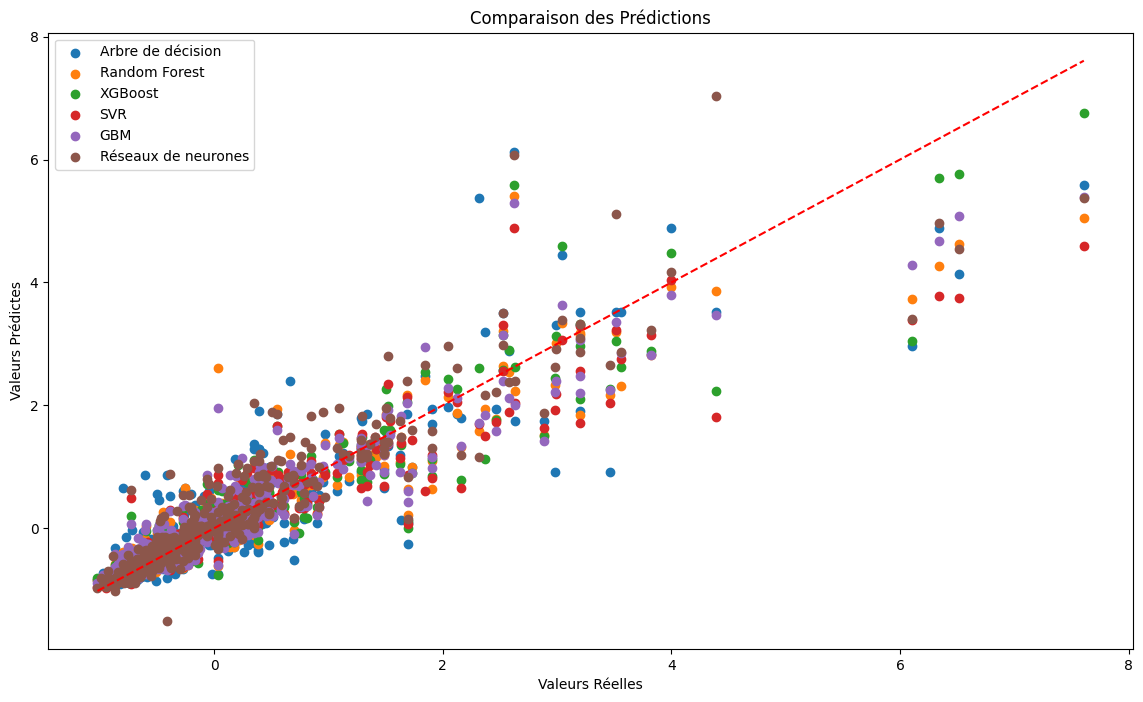

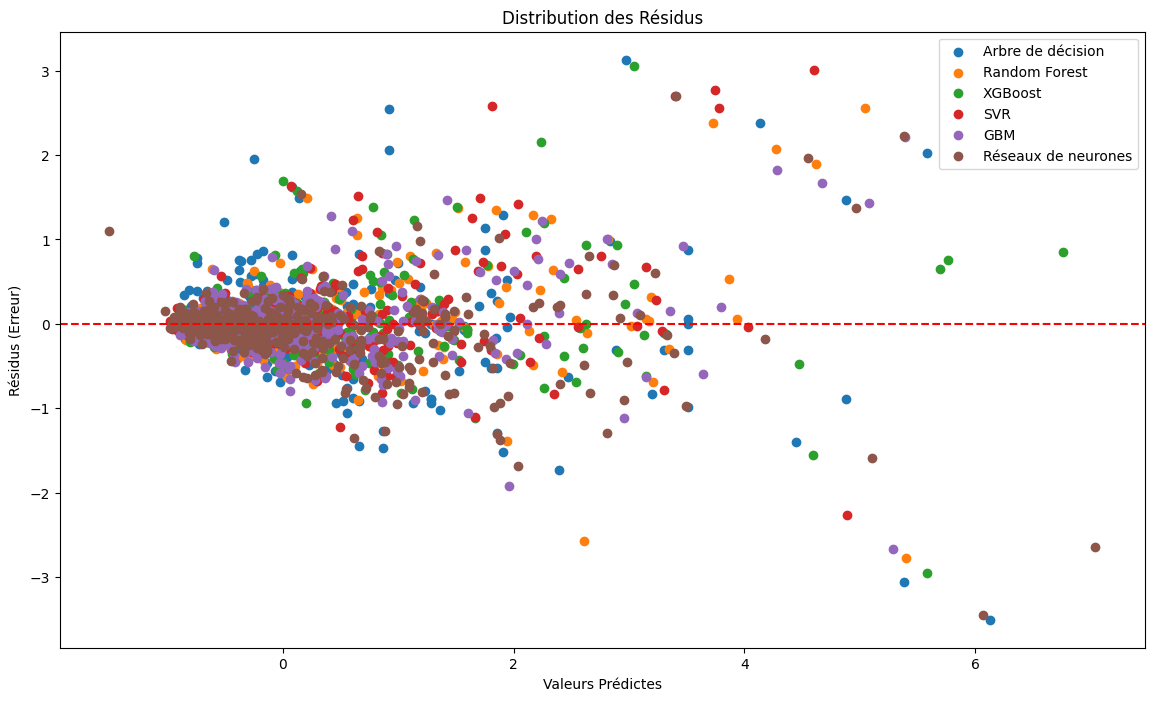

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Modèles et prédictions
models = {
    "Arbre de décision": y_pred_tree,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVR": y_pred_svr,
    "GBM": y_pred_gbm,
    "Réseaux de neurones": y_pred_mlp
}

# Courbe Prédiction vs Valeur Réelle
plt.figure(figsize=(14, 8))
for name, y_pred in models.items():
    plt.scatter(y_test, y_pred, label=name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédictes")
plt.title("Comparaison des Prédictions")
plt.legend()
plt.show()

# Courbe des Résidus
plt.figure(figsize=(14, 8))
for name, y_pred in models.items():
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, label=name)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valeurs Prédictes")
plt.ylabel("Résidus (Erreur)")
plt.title("Distribution des Résidus")
plt.legend()
plt.show()


Aprés considération des métriques et des scores, on a choisit le modéle GBM (Gradient Boositng Regressor)

In [47]:
import pickle
# Nom du fichier pour sauvegarder le modèle
model_filename = "gbm_model.pkl"

# Sauvegarde du modèle dans le fichier .pkl
with open(model_filename, "wb") as file:
    pickle.dump(gbm_model, file)

print(f"Modèle Gradient Boosting sauvegardé avec succès dans {model_filename}")

Modèle Gradient Boosting sauvegardé avec succès dans gbm_model.pkl


In [49]:
import pickle
# Sauvegarder les encodeurs et le scaler
with open('encoders.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler_standard, file)

In [50]:
# Sauvegarder les colonnes générées après le One-Hot Encoding
one_hot_columns = df_encoded.columns.tolist()

with open("one_hot_columns.pkl", "wb") as file:
    pickle.dump(one_hot_columns, file)

